# Многопоточность в Python

1. [Поток и процесс. Создание процессов и процессов](#process)
2. [Передача данных между потоками при помощи pipe и общей памяти](#gen)
3. [GIL](#GIL)
5. [Асинхронное выполнение потоков](#asynchronous)
6. [Библиотеки threading, multiprocessing и asyncio](#threading)

## Поток и процесс. Создание нитей (потоков) и процессов. <a name="process"></a>

In [1]:
import _thread
import time

# Define a function for the thread
def print_time(threadName, delay):
   count = 0
   while count < 5:
      time.sleep(delay)
      count += 1
      print("%s: %s" % (threadName, time.ctime(time.time())))

# Create two threads as follows
try:
   _thread.start_new_thread(print_time, ("Thread-1", 2,))
   _thread.start_new_thread(print_time, ("Thread-2", 4,))
except:
   print("Error: unable to start thread")

while 1:
   pass

Thread-1: Fri Feb 19 11:48:14 2021
Thread-1: Fri Feb 19 11:48:16 2021
Thread-2: Fri Feb 19 11:48:16 2021
Thread-1: Fri Feb 19 11:48:18 2021
Thread-2: Fri Feb 19 11:48:20 2021Thread-1: Fri Feb 19 11:48:20 2021

Thread-1: Fri Feb 19 11:48:22 2021
Thread-2: Fri Feb 19 11:48:24 2021
Thread-2: Fri Feb 19 11:48:28 2021
Thread-2: Fri Feb 19 11:48:32 2021


KeyboardInterrupt: 

### Запуск потока с применением threading

In [ ]:
import threading
import time


class MyThread(threading.Thread):
    def __init__(self, name, delay):
        threading.Thread.__init__(self)
        self.name = name
        self.delay = delay

    def run(self):
        print('Starting thread %s.' % self.name)
        thread_count_down(self.name, self.delay)
        print('Finished thread %s.' % self.name)

def thread_count_down(name, delay):
    counter = 5

    while counter:
        time.sleep(delay)
        print('Thread %s counting down: %i...' % (name, counter))
        counter -= 1

In [2]:
import threading

class MyThread(threading.Thread):
    def __init__(self, x):
        threading.Thread.__init__(self)
        self.x = x

    def run(self):
        print('Starting processing %i...' % x)
        is_prime(self.x)

In [5]:
my_input = [2, 193, 323, 1327, 433785907]

threads = []

for x in my_input:
    temp_thread = MyThread(x)
    temp_thread.start()

    threads.append(temp_thread)

for thread in threads:
    thread.join()

print('Finished.')

Starting processing 2...
Starting processing 193...
Starting processing 323...
Starting processing 1327...
Starting processing 433785907...
Finished.


Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/tkhirianov/bin/miniconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "<ipython-input-2-b55f860704ec>", line 10, in run
    is_prime(self.x)
NameError: name 'is_prime' is not defined
Exception in thread Thread-15:
Traceback (most recent call last):
  File "/home/tkhirianov/bin/miniconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "<ipython-input-2-b55f860704ec>", line 10, in run
    is_prime(self.x)
NameError: name 'is_prime' is not defined


Exception in thread Thread-16:
Traceback (most recent call last):
  File "/home/tkhirianov/bin/miniconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "<ipython-input-2-b55f860704ec>", line 10, in run
    is_prime(self.x)
NameError: name 'is_prime' is not defined

Exception in thread Thread-17:
Traceback (most recent call last):
  File "/home/tkhirianov/bin/mi

## Передача данных между потоками при помощи pipe и общей памяти <a name="gen"></a>

### Queue

Queue предоставляет нам механизм взаимодействия потоков между процессами FIFO (первым пришел — первым обслужен).

In [7]:
from multiprocessing import Process, Queue
import random

def f(q):
    q.put([42, None, 'hello'])

def main():
    q = Queue()
    p = Process(target = f, args = (q,))
    p.start()
    print(q.get())
    
if __name__ == '__main__':
    main()

[42, None, 'hello']


[42, None, 'hello']

### Pipe

Это структура данных, которая используется для связи между процессами в многопроцессорных программах. Функция Pipe() возвращает пару объектов соединения, соединенных каналом, который по умолчанию является дуплексным (двухсторонним). Работа Pipe происходит следующим образом. Pipe возвращает пару объектов соединения, которые представляют два конца канала. У каждого объекта есть два метода — send() и recv() для взаимодействия между процессами.

In [12]:
from multiprocessing import Process, Pipe

def process2(conn):
    conn.send([42, None, 'hello'])
    x = conn.recv()
    print(f'f: x={x}')
    conn.close()

if __name__ == '__main__':
    parent_conn, child_conn = Pipe()
    p = Process(target = process2, args = (child_conn,))
    p.start()
    y = parent_conn.recv()
    print(y)
    parent_conn.send(y[::-1])
    p.join()

f: x=['hello', None, 42]
[42, None, 'hello']


[42, None, 'hello']

### Менеджер

Менеджер — это класс многопроцессорных модулей, который обеспечивает способ координации общей информации между всеми его пользователями. Управляющий объект управляет процессом сервера, который управляет общими объектами и позволяет другим процессам манипулировать ими. Другими словами, менеджеры предоставляют способ создавать данные, которые могут быть разделены между различными процессами. Ниже приведены различные свойства объекта менеджера —

Основным свойством менеджера является управление серверным процессом, который управляет общими объектами.

Другим важным свойством является обновление всех общих объектов, когда какой-либо процесс изменяет их.

Основным свойством менеджера является управление серверным процессом, который управляет общими объектами.

Другим важным свойством является обновление всех общих объектов, когда какой-либо процесс изменяет их.

Пример ниже использует объект менеджера для создания записи списка в процессе сервера, а затем добавления новой записи в этот список.

In [ ]:
import multiprocessing

def print_records(records):
    for record in records:
        print("Name: {0}\nScore: {1}\n".format(record[0], record[1]))

def insert_record(record, records):
    records.append(record)
      print("A New record is added\n")

if __name__ == '__main__':
    with multiprocessing.Manager() as manager:
        
        records = manager.list([('Computers', 1), ('Histoty', 5), ('Hindi',9)])
        new_record = ('English', 3)
        
        p1 = multiprocessing.Process(target = insert_record, args = (new_record, records))
        p2 = multiprocessing.Process(target = print_records, args = (records,))
        p1.start()
        p1.join()
        p2.start()
        p2.join()

A New record is added

Name: Computers

Score: 1

Name: Histoty

Score: 5

Name: Hindi

Score: 9

Name: English

Score: 3

Использование пространства имен для обмена данными между основным процессом и дочерним процессом.

In [ ]:
import multiprocessing

def Mng_NaSp(using_ns):
    
    using_ns.x +=5
    using_ns.y *= 10

if __name__ == '__main__':
    manager = multiprocessing.Manager()
    using_ns = manager.Namespace()
    using_ns.x = 1
    using_ns.y = 1
    
    print ('before', using_ns)
    p = multiprocessing.Process(target = Mng_NaSp, args = (using_ns,))
    p.start()
    p.join()
    print ('after', using_ns)

In [ ]:
before Namespace(x = 1, y = 1)

after Namespace(x = 6, y = 10)

### Ctypes-Array и Value

Многопроцессорный модуль предоставляет объекты Array и Value для хранения данных в карте общей памяти. Массив — это массив ctypes, выделенный из общей памяти, а Value — объект ctypes, выделенный из общей памяти.

In [ ]:
def f(n, a):
    n.value = 3.1415927
    for i in range(len(a)):
        a[i] = -a[i]

if __name__ == '__main__':
    num = Value('d', 0.0)
    arr = Array('i', range(10))
    
    p = Process(target = f, args = (num, arr))
    p.start()
    p.join()
    print (num.value)
    print (arr[:])

3.1415927

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

### Библиотека Python — PyCSP

In [ ]:
!pip install PyCSP

Пример запуска двух процессов параллельно друг другу.

In [ ]:
from pycsp.parallel import *
import time
@process
def P1():
   time.sleep(1)
   print('P1 exiting')
@process
def P2():
   time.sleep(1)
   print('P2 exiting')
def main():
   Parallel(P1(), P2())
   print('Terminating')
if __name__ == '__main__':
   main()

## GIL <a name="GIL"></a>

Python Global Interpreter Lock (GIL) — это своеобразная блокировка, позволяющая только одному потоку управлять интерпретатором Python. 

Пример кода, демонстрирующий работу переменных подсчёта ссылок:

In [ ]:
import sys

a = []
b = a
sys.getrefcount(a)

Несложная CPU-bound программа, которая ведёт обратный отсчёт:

In [ ]:
import time
from threading import Thread

COUNT = 50000000

def countdown(n):
    while n > 0:
        n -= 1

start = time.time()
countdown(COUNT)
end = time.time()

print('Затраченное время -', end - start)

Запустив это на 4х-ядерном компьютере получим такой результат:

Затраченное время - 6.20024037361145

Реализация обратного отсчёта ведётся в двух параллельных потоках:

In [ ]:
import time
from threading import Thread

COUNT = 50000000

def countdown(n):
    while n > 0:
        n -= 1

t1 = Thread(target=countdown, args=(COUNT//2,))
t2 = Thread(target=countdown, args=(COUNT//2,))

start = time.time()
t1.start()
t2.start()
t1.join()
t2.join()
end = time.time()

print('Затраченное время -', end - start)

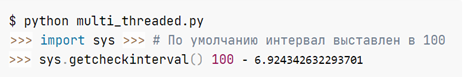

## Асинхронное выполнение потоков <a name="asynchronous"></a>

Асинхронная программа может одновременно обрабатывать задачи, но ее контекст переключается внутри, а не системным планировщиком.

## Библиотеки threading, multiprocessing и asyncio <a name="threading"></a>

In [ ]:
from multiprocessing import Process

def print_func(continent='Asia'):
    print('The name of continent is : ', continent)

if __name__ == "__main__":  # confirms that the code is under main function
    names = ['America', 'Europe', 'Africa']
    procs = []
    proc = Process(target=print_func)  # instantiating without any argument
    procs.append(proc)
    proc.start()

    # instantiating process with arguments
    for name in names:
        # print(name)
        proc = Process(target=print_func, args=(name,))
        procs.append(proc)
        proc.start()

    # complete the processes
    for proc in procs:
        proc.join()

The name of continent is :  Asia
    
The name of continent is :  America
    
The name of continent is :  Europe
    
The name of continent is :  Africa

In [ ]:
def print_name(prefix):
    print("Searching prefix:{}".format(prefix))
    try : 
        while True:
                # yeild used to create coroutine
                name = (yield)
                if prefix in name:
                    print(name)
    except GeneratorExit:
            print("Closing coroutine!!")
            
corou = print_name("Dear")
corou.__next__()
corou.send("James")
corou.send("Dear James")
corou.close()

In [ ]:
Searching prefix:Dear
    
Dear James

Closing coroutine!!

Пример в котором запускаем 3 асинхронных таска, которые по-отдельности делают запросы к Reddit, извлекают и выводят содержимое JSON. 

Мы воспользовались aiohttp – клиентскую библиотеку http, которая гарантирует, что даже HTTP-запрос будет выполнен асинхронно.

In [ ]:
import signal  
import sys  
import asyncio  
import aiohttp  
import json

loop = asyncio.get_event_loop()  
client = aiohttp.ClientSession(loop=loop)

async def get_json(client, url):  
    async with client.get(url) as response:
        assert response.status == 200
        return await response.read()

async def get_reddit_top(subreddit, client):  
    data1 = await get_json(client, 'https://www.reddit.com/r/' + subreddit + '/top.json?sort=top&t=day&limit=5')

    j = json.loads(data1.decode('utf-8'))
    for i in j['data']['children']:
        score = i['data']['score']
        title = i['data']['title']
        link = i['data']['url']
        print(str(score) + ': ' + title + ' (' + link + ')')

    print('DONE:', subreddit + '\n')

def signal_handler(signal, frame):  
    loop.stop()
    client.close()
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

asyncio.ensure_future(get_reddit_top('python', client))  
asyncio.ensure_future(get_reddit_top('programming', client))  
asyncio.ensure_future(get_reddit_top('compsci', client))  
loop.run_forever()

50: Undershoot: Parsing theory in 1965 (http://jeffreykegler.github.io/Ocean-of-Awareness-blog/individual/2018/07/knuth_1965_2.html)

12: Question about best-prefix/failure function/primal match table in kmp algorithm (https://www.reddit.com/r/compsci/comments/8xd3m2/question_about_bestprefixfailure_functionprimal/)

1: Question regarding calculating the probability of failure of a RAID system (https://www.reddit.com/r/compsci/comments/8xbkk2/question_regarding_calculating_the_probability_of/)

DONE: compsci

336: /r/thanosdidnothingwrong -- banning people with python (https://clips.twitch.tv/AstutePluckyCocoaLitty)

175: PythonRobotics: Python sample codes for robotics algorithms (https://atsushisakai.github.io/PythonRobotics/)

23: Python and Flask Tutorial in VS Code (https://code.visualstudio.com/docs/python/tutorial-flask)

17: Started a new blog on Celery - what would you like to read about? (https://www.python-celery.com)

14: A Simple Anomaly Detection Algorithm in Python (https://medium.com/@mathmare_/pyng-a-simple-anomaly-detection-algorithm-2f355d7dc054)

DONE: python

1360: git bundle (https://dev.to/gabeguz/git-bundle-2l5o)

1191: Which hashing algorithm is best for uniqueness and speed? Ian Boyd's answer (top voted) is one of the best comments I've seen on Stackexchange. (https://softwareengineering.stackexchange.com/questions/49550/which-hashing-algorithm-is-best-for-uniqueness-and-speed)

430: ARM launches “Facts” campaign against RISC-V (https://riscv-basics.com/)

244: Choice of search engine on Android nuked by “Anonymous Coward” (2009) (https://android.googlesource.com/platform/packages/apps/GlobalSearch/+/592150ac00086400415afe936d96f04d3be3ba0c)

209: Exploiting freely accessible WhatsApp data or “Why does WhatsApp web know my phone’s battery level?” (https://medium.com/@juan_cortes/exploiting-freely-accessible-whatsapp-data-or-why-does-whatsapp-know-my-battery-level-ddac224041b4)

DONE: programming

### Библиотека multiprocessing

In [ ]:
import os
from multiprocessing import Process
 
def doubler(number):
    """
    Функция умножитель на два
    """
    result = number * 2
    proc = os.getpid()
    print('{0} doubled to {1} by process id: {2}'.format(
        number, result, proc))
 
 
if __name__ == '__main__':
    numbers = [5, 10, 15, 20, 25]
    procs = []
    
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
    
    for proc in procs:
        proc.join()

5 doubled to 10 by process id: 10468
    
10 doubled to 20 by process id: 10469
    
15 doubled to 30 by process id: 10470
    
20 doubled to 40 by process id: 10471
    
25 doubled to 50 by process id: 10472

In [ ]:
import os
from multiprocessing import Process, current_process

def doubler(number):
    result = number * 2
    proc_name = current_process().name
    print('{0} doubled to {1} by: {2}'.format(
        number, result, proc_name))
 
 
if __name__ == '__main__':
    numbers = [5, 10, 15, 20, 25]
    procs = []
    proc = Process(target=doubler, args=(5,))
    
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
    
    proc = Process(target=doubler, name='Test', args=(2,))
    proc.start()
    procs.append(proc)
    
    for proc in procs:
        proc.join()

5 doubled to 10 by: Process-2
    
10 doubled to 20 by: Process-3
    
15 doubled to 30 by: Process-4
    
20 doubled to 40 by: Process-5
    
25 doubled to 50 by: Process-6
    
2 doubled to 4 by: Test

### Замки (Locks)
Модуль multiprocessing поддерживает замки так же, как и модуль threading. Все что вам нужно, это импортировать Lock, повесить его, сделать что-нибудь и снять его. Давайте посмотрим:

In [ ]:
from multiprocessing import Process, Lock

def printer(item, lock):
    """
    Выводим то что передали
    """
    lock.acquire()
    try:
        print(item)
    finally:
        lock.release()
 
 
if __name__ == '__main__':
    lock = Lock()
    items = ['tango', 'foxtrot', 10]
    
    for item in items:
        p = Process(target=printer, args=(item, lock))
        p.start()

### Логирование (Logging)

In [ ]:
import logging
import multiprocessing
from multiprocessing import Process, Lock

def printer(item, lock):
    """
    Выводим то что передали
    """
    lock.acquire()
    try:
        print(item)
    finally:
        lock.release()
 
 
if __name__ == '__main__':
    lock = Lock()
    items = ['tango', 'foxtrot', 10]
    multiprocessing.log_to_stderr()
    
    logger = multiprocessing.get_logger()
    logger.setLevel(logging.INFO)
    
    for item in items:
        p = Process(target=printer, args=(item, lock))
        p.start()

[INFO/Process-1] child process calling self.run()

tango

[INFO/Process-1] process shutting down

[INFO/Process-1] process exiting with exitcode 0

[INFO/Process-2] child process calling self.run()

[INFO/MainProcess] process shutting down

foxtrot

[INFO/Process-2] process shutting down

[INFO/Process-3] child process calling self.run()

[INFO/Process-2] process exiting with exitcode 0

10

[INFO/MainProcess] calling join() for process Process-3

[INFO/Process-3] process shutting down

[INFO/Process-3] process exiting with exitcode 0

[INFO/MainProcess] calling join() for process Process-2

## Класс Pool
Класс Pool используется для показа пула рабочих процессов. Он включает в себя методы, которые позволяют вам разгружать задачи к рабочим процессам.

In [ ]:
from multiprocessing import Pool

def doubler(number):
    return number * 2

if __name__ == '__main__':
    numbers = [5, 10, 20]
    pool = Pool(processes=3)
    print(pool.map(doubler, numbers))

### Связь между процессами

In [ ]:
from multiprocessing import Process, Queue

sentinel = -1
 
def creator(data, q):
    """
    Creates data to be consumed and waits for the consumer
    to finish processing
    """
    print('Creating data and putting it on the queue')
    for item in data:
        q.put(item)
 
 
def my_consumer(q):
    """
    Consumes some data and works on it
    In this case, all it does is double the input
    """
    while True:
        data = q.get()
        print('data found to be processed: {}'.format(data))
    
        processed = data * 2
        print(processed)
    
        if data is sentinel:
            break
 
 
if __name__ == '__main__':
    q = Queue()
    data = [5, 10, 13, -1]
    
    process_one = Process(target=creator, args=(data, q))
    process_two = Process(target=my_consumer, args=(q,))
    
    process_one.start()
    process_two.start()
    
    q.close()
    q.join_thread()
    
    process_one.join()
    process_two.join()

## Lambda-функции

Lambda-функции — это  анонимные функции, подчиняющиеся более строгому, но более лаконичному синтаксису, чем обычные функции Python.

Функция тождества (identity function), функция, которая возвращает свой аргумент, выражается стандартным определением функции Python с использованием ключевого слова def следующим образом:

In [ ]:
def identity(x):
    return x

In [ ]:
lambda x: x

Функция, которая добавляет 1 к аргументу:

In [ ]:
lambda x: x + 1

(lambda x: x + 1)(2) = lambda 2: 2 + 1

                     = 2 + 1
                     
                     = 3

In [ ]:
add_one = lambda x: x + 1
add_one(2)

In [ ]:
def add_one(x):
    return x + 1

In [ ]:
full_name = lambda first, last: f'Full name: {first.title()} {last.title()}'
full_name('guido', 'van rossum')

'Full name: Guido Van Rossum'

Анонимные функции

Лямбда-функции

Лямбда-выражения

Лямбда-абстракции

Лямбда-форма

Функциональные литералы

Анонимная функция — это функция без имени. В Python анонимная функция создается с помощью ключевого слова lambda.

In [ ]:
lambda x, y: x + y

Выражение немедленного вызова функции (IIFE —  Immediately Invoked Function Expression, произносится «iffy»).

In [ ]:
(lambda x, y: x + y)(2, 3)

Лямбда-функция может быть функцией более высокого порядка, принимая функцию (нормальную или лямбда-функцию) в качестве аргумента.

In [ ]:
high_ord_func = lambda x, func: x + func(x)
high_ord_func(2, lambda x: x * x)

In [ ]:
high_ord_func(2, lambda x: x + 3)

## Сопроцессы <a name="Coprocesses"></a>

Со-процессинг — это одновременное выполнение двух процедур, одна из которых считывает вывод другой.